In [257]:
import cv2
from imwatermark import WatermarkEncoder, WatermarkDecoder
import os
import time
import matplotlib.pyplot as plt 

In [258]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [259]:
encodings=['dwtDct','dwtDctSvd','rivaGan','dwtDct','dwtDctSvd','rivaGan']
selected_encoding = encodings[1]
output_folder = os.path.join("output")

In [260]:
def embed(input_image_file, watermark, output_file):
    bgr = cv2.imread(input_image_file)

    encoder = WatermarkEncoder()
    encoder.set_watermark('bytes', watermark.encode('utf-8'))
    bgr_encoded = encoder.encode(bgr, selected_encoding)
    cv2.imwrite(output_folder+"/"+output_file, bgr_encoded)
    plt.imshow(bgr_encoded[:,:,::-1])

In [261]:
def decode(output_file, length):
    bgr = cv2.imread(output_folder+"/"+output_file)
    decoder = WatermarkDecoder('bytes', length)
    watermark = decoder.decode(bgr, selected_encoding)
    print("================================================")
    print(watermark.decode('utf-8'))
    print("================================================")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


dependencieswont


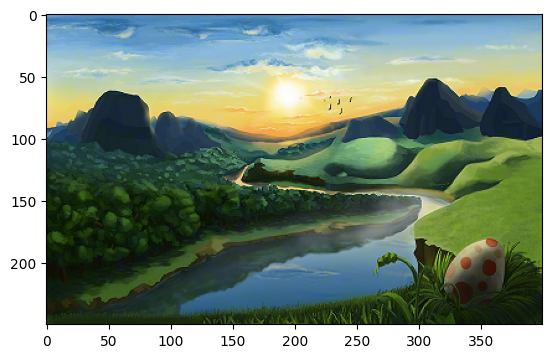

In [262]:
WatermarkEncoder.loadModel()
input_image_file = "test.png"
timestr = time.strftime("%Y%m%d-%H%M%S")
filename  = "ipynb_"+timestr+"__.jpg"
watermark = "dependencieswont"
embed(input_image_file=input_image_file, watermark=watermark, output_file=filename)
watermark = watermark.encode("utf-8")
decode(filename,length=8*watermark.__len__())